In [49]:
import random
import timeit
import matplotlib.pyplot as plotter

In [93]:
def binarySearch(aCollection, anElement):
   
    size = len(aCollection)
    
    if anElement < aCollection[0] or anElement > aCollection[-1]:
        return -1
    
    if size < 2 and anElement in aCollection:
        #If the size of the list is too small I rely the 'index' function because the complexity of this case is negligible
        result = aCollection.index(anElement)
        return result
        
    firstHalf = aCollection[0:size//2]
    secondHalf = aCollection[size//2:size]
    
    if anElement <= firstHalf[-1]:
        result = binarySearch(firstHalf, anElement)
    else:
        result = (size//2)+ binarySearch(secondHalf, anElement)   
    
    return result

In [94]:
def ternarySearch(aCollection, anElement):
   
    size = len(aCollection)
    
    if anElement < aCollection[0] or anElement > aCollection[-1]:
        return -1
    
    if size < 3 and anElement in aCollection:
        #If the size of the list is too small I rely the 'index' function because the complexity of this case is negligible
        result = aCollection.index(anElement)
        return result
        
    firstQuarter = aCollection[0:size//3]
    secondQuarter = aCollection[size//3:(size//3)*2]
    thirdQuarter = aCollection[(size//3)*2:size]
    
    if anElement <= firstQuarter[-1]:
        result = ternarySearch(firstQuarter, anElement)
    elif anElement <= secondQuarter[-1]:
        result = (size//3) + ternarySearch(secondQuarter, anElement)
    else:
        result = (size//3)*2 + ternarySearch(thirdQuarter, anElement)   
    
    return result

In [95]:
minNumber = 10
maxNumber = 10000
iterations = 100 
st = 100

binaryTimeList = list()
ternaryTimeList = list()

for n in range(minNumber, maxNumber, st):
    binaryExecutionTimeAcumulator = 0
    ternaryExecutionTimeAcummulator = 0

    for i in range(1, iterations):
        randomListSize = random.randint(1, maxNumber)
        randomList = list(range(1, randomListSize))
        
        randomElement = random.randint(1, randomListSize)
        
        binaryExecutionTimeAcumulator += timeit.timeit(lambda: binarySearch(randomList, randomElement), number = 1)
        ternaryExecutionTimeAcummulator += timeit.timeit(lambda: ternarySearch(randomList, randomElement), number = 1)
        
    binarySearchAverage = binaryExecutionTimeAcumulator / iterations
    ternarySearchAverage = ternaryExecutionTimeAcummulator / iterations
        
    binaryTimeList.append(binarySearchAverage)
    ternaryTimeList.append(ternarySearchAverage)        

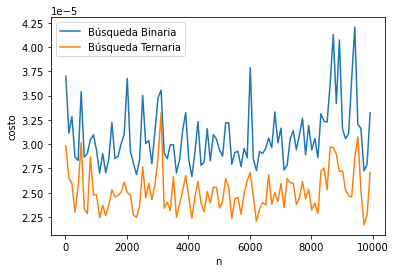

In [96]:
axisX = list(range(minNumber, maxNumber, st))
plotter.xlabel('n')
plotter.ylabel('costo')

plotter.plot(axisX, binaryTimeList, label = 'Búsqueda Binaria')
plotter.plot(axisX, ternaryTimeList, label = 'Búsqueda Ternaria')

plotter.legend()